# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

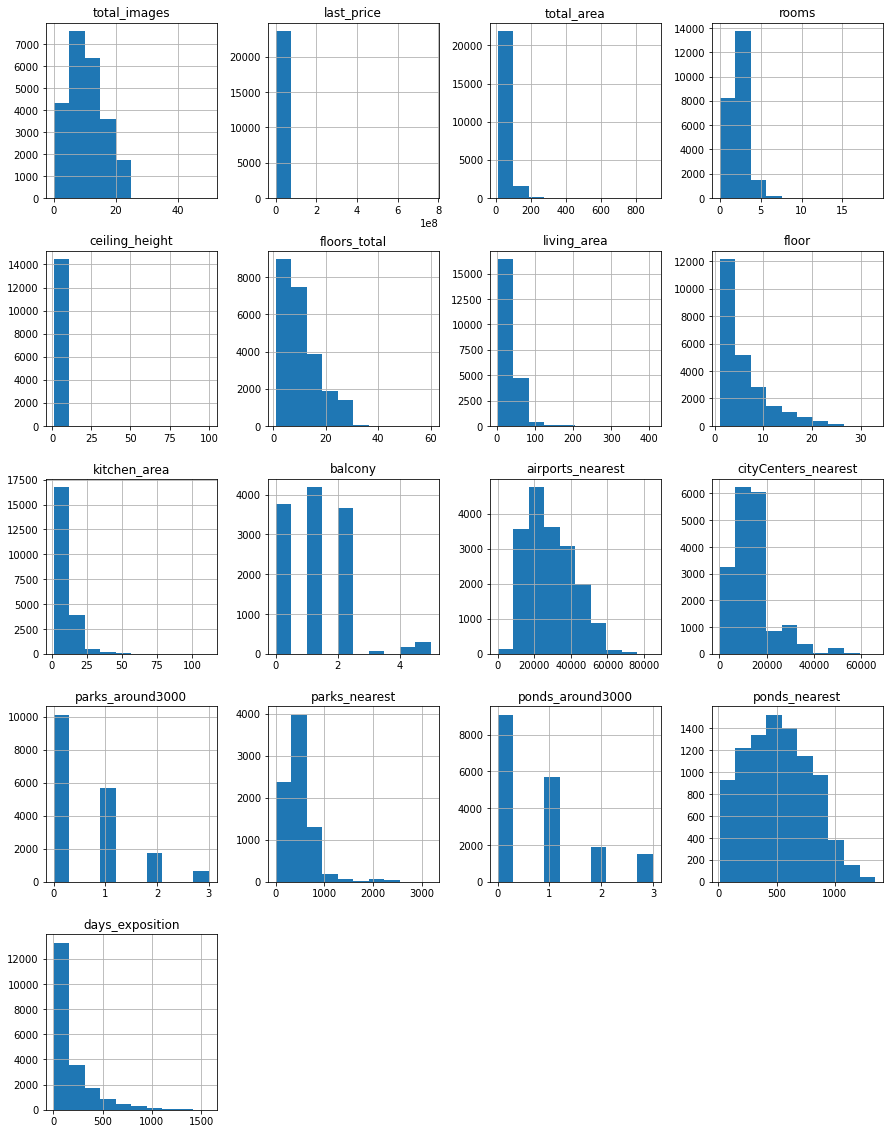

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) #снимаем ограничение на показ столбцов

data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.hist(figsize=(15, 20))

In [2]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Проанализировали гистограммы. В основном распределения ожидаемы. Смущает распределения по площади кухни, высоте потолков, общей площади, и цены. В них надо поискать аномально большие значения. 
В столбцах по балконам и высоте потолков пропушены почти половина значений(видимо не предоставлены продавцами). В столбцах по расстоянию до аэропортов, парков и прочее также не достает значений, что связано скорее всего со сбоем в автоматическом определении по картам. Проуски во времени размещения связаны видимо с тем, что публикация на это время еще активна

### Предобработка данных

In [4]:
print(len(data[data['balcony'].isna()]))

data['balcony']=data['balcony'].fillna(0)

print(len(data[data['balcony'].isna()]))

11519
0


In [5]:
print(len(data[data['parks_around3000'].isna()]))

data['parks_around3000']=data['parks_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
print(len(data[data['parks_around3000'].isna()]))
print(len(data[data['ponds_around3000'].isna()]))

5518
0
0


In [6]:
print(len(data[data['is_apartment'].isna()]))

data['is_apartment']=data['is_apartment'].fillna(False)
print(len(data[data['is_apartment'].isna()]))



20924
0


In [7]:
print(len(data[data['ceiling_height'].isna()]))

ceiling_median=data['ceiling_height'].median()

data['ceiling_height']=data['ceiling_height'].fillna(ceiling_median)

print (ceiling_median)

print(len(data[data['ceiling_height'].isna()]))

9195
2.65
0


In [8]:
data['rooms']= data['rooms'].astype('int')

for i in data['rooms'].unique():
    median=data.query('rooms == @i')['living_area'].median()
    data.loc[data['rooms']==i]=data.loc[data['rooms']==i].fillna(value={'living_area': median})
    
print(len(data[data['living_area'].isna()]))

0


In [9]:

for i in data['rooms'].unique():
    median=data.query('rooms == @i')['kitchen_area'].median()
    data.loc[data['rooms']==i]=data.loc[data['rooms']==i].fillna(value={'kitchen_area': median})
    
print(len(data[data['kitchen_area'].isna()]))

197


я не могу понять в чем ошибка. Но осталось 200 пропусков из почти 3 тысяч. 
Продолжаю работать дальше.
В целом по пропускам уже хорошая картина.

In [10]:
display(data)
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,False,False,9.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,False,False,8.80,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,30.5,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Заполняем пропуски. Балконы- там, где не указано, ставлю 0, т.к.скорее всего балконов нет. 
Высота потолков - медианным значением, так как есть слишком большие значения в выборке.
Аппартаменты - заполняем булевым False.
Жилая площадь и площадь кухни заполняем медианным значением среза по числу комнат.
Число ближайших парков и прудов заполняем нулями.



In [11]:
data['is_apartment']= data['is_apartment'].astype(bool)
data['balcony']= data['balcony'].astype(int)
data['parks_around3000']= data['parks_around3000'].astype(int)
data['ponds_around3000']= data['ponds_around3000'].astype(int)
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format="%Y/%m/%dT%H:%M:%S")


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23502 non-null  float64       
 13  balcony         

In [12]:
print(len(data['locality_name'].unique()))

#заменим все ё на е

data['locality_name'] = data['locality_name'].str.replace('ё','е')
#избавимся от - в названии
data['locality_name'] = data['locality_name'].str.replace('-','_')

#стало меньше на 30. Но все равно еще 331

#по предложению Сослана удаляем все дополнительные слова в названиях и приводим к нижнему регистру

dop_names=['поселок городского типа', 'городской поселок', 'деревня', 'село','поселок','пок']
ch_nane=''

data['locality_name'] = data['locality_name'].replace(dop_names,ch_nane, regex=True)

data['locality_name'] =data['locality_name'].str.lower()

print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))
#легким движением руки остались только 311 уникальных значений



#print(unique.sort())

365
['санкт_петербург' 'пок шушары' ' янино_1' 'пок парголово' 'пок мурино'
 'ломоносов' 'сертолово' 'петергоф' 'пушкин' ' кудрово' 'коммунар'
 'колпино' ' красный бор' 'гатчина' ' федоровское' 'выборг' 'кронштадт'
 'кировск' ' новое девяткино' 'пок металлострой' ' лебяжье' ' сиверский'
 'пок молодцово' ' кузьмоловский' 'садовое товарищество новая ропша'
 'павловск' ' пикколово' 'всеволожск' 'волхов' 'кингисепп' 'приозерск'
 'сестрорецк' ' куттузи' 'пок аннино' ' ефимовский' 'пок плодовое'
 ' заклинье' 'пок торковичи' 'пок первомайское' 'красное село'
 'пок понтонный' 'сясьстрой' ' старая' ' лесколово' 'пок новый свет'
 'сланцы' ' путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' ' оржицы' ' кальтино' 'кудрово'
 'пок романовка' 'пок бугры' ' рощино' 'кириши' 'луга' 'волосово'
 'отрадное' ' павлово' 'пок оредеж' ' копорье' 'пок молодежное' 'тихвин'
 'пок победа' ' нурма' ' синявино' 'тосно' 'пок стрельна' 'бокситогорск'
 'пок александровская' ' лоп

Устраняем дубликаты


In [13]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0,санкт_петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.00,2,пок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.30,0,санкт_петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,45.0,9,False,False,False,9.50,0,санкт_петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0,санкт_петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0,санкт_петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,False,False,8.80,0,рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12,False,False,False,23.30,2,санкт_петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


In [14]:
#первая же строчка с ценой 15 млн за 25 квадратов и высотой потолков 100 метров вызывает сомнения. Удаляем. 
#В остальных меняем значения, так как явно пропущены запятые

data=data.drop(data.index[22869])

for i in data['ceiling_height'].unique():
    if i >= 20:
        j=i/10
        data['ceiling_height']=data['ceiling_height'].replace(i,j)
#осталось две строки со значениями высоты потолков 14 и 10 метров. Эти строки удалим

data=data.query('ceiling_height < 7')



In [15]:
#удалим пропуски в слолбце 'cityCenters_nearest'
# заполним медианным значением
#
for i in data['locality_name'].unique():
    mean=data.query('locality_name == @i')['cityCenters_nearest'].mean()
    data.loc[data['locality_name']==i]=data.loc[data['locality_name']==i].fillna(value={'cityCenters_nearest': mean})

#остались еще пропуски. заполним их нулями, тк это касается деревень, и там все в центре, либо расброс минимален

data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(0)


In [16]:
#убираем из таблицы строки с числом конмат 0 и которые не аппартаменты и не студия. Итого минус 197 строк

data=data.drop(data[((data['open_plan']!=True) | (data['is_apartment']!=True)) & (data['rooms']==0)].index)


In [17]:
print(data.describe())



       total_images    last_price    total_area         rooms  ceiling_height  \
count  23495.000000  2.349500e+04  23495.000000  23495.000000    23495.000000   
mean       9.875633  6.568493e+06     60.613414      2.088146        2.696547   
std        5.682988  1.092028e+07     35.614519      1.066098        0.221391   
min        0.000000  1.219000e+04     12.000000      1.000000        1.000000   
25%        6.000000  3.450000e+06     40.200000      1.000000        2.600000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     70.000000      3.000000        2.700000   
max       50.000000  7.630000e+08    900.000000     19.000000        6.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23412.000000  23495.000000  23495.000000  23495.000000  23495.000000   
mean      10.622160     34.455237      5.869717     10.464999      0.587359   
std        6.570319     21.738802

       total_images    last_price    total_area         rooms  ceiling_height  \
count  21003.000000  2.100300e+04  21003.000000  21003.000000    21003.000000   
mean       9.673856  4.821092e+06     52.814178      1.933295        2.669367   
std        5.531454  2.225668e+06     17.832191      0.878852        0.178220   
min        0.000000  4.300000e+05     12.000000      1.000000        1.000000   
25%        6.000000  3.300000e+06     39.000000      1.000000        2.600000   
50%        9.000000  4.400000e+06     49.000000      2.000000        2.650000   
75%       14.000000  5.950000e+06     63.000000      3.000000        2.670000   
max       39.000000  1.249900e+07    124.800000      6.000000        5.300000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  20932.000000  21003.000000  21003.000000  21003.000000  21003.000000   
mean      10.713692     30.364264      5.865448      9.248206      0.587535   
std        6.593572     12.818105

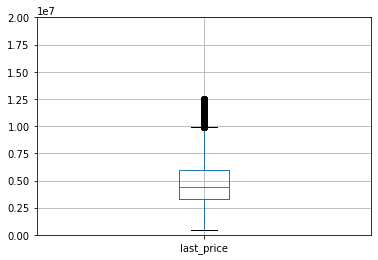

In [18]:
plt.ylim(0, 20000000)

#верхний ус заканчивается в районе 125 в общей площадо, поэтому отбросим все данные выше этого значения. 
#Аналогично поступим со всеми остальными колонками

data=data.query('total_area < 125')

data=data.query('kitchen_area < 20')

data=data.query('living_area < 80')

data=data.query('last_price < 12500000')


data.boxplot('last_price')


print(data.describe())

устраняем редкие и выбивающиеся значения.
По анализу гистограмм было видно, что особое внимание надо уделить столбцам площади кухни, высоте потолков, общей площади, и цены.
Как видно, среднее свартатичное по многим позициям уменшилось значительно, распределение приближается к нормальному.


### Посчитайте и добавьте в таблицу новые столбцы

посчитано и добавлено в таблицу: цена одного квадратного метра


In [19]:
data['price_p_metr']=data['last_price']/data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_p_metr
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,пок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт_петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0,янино_1,NaN,0.0,0,NaN,0,NaN,55.0,95065.789474
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1,пок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.5,22,False,False,False,18.9,2,санкт_петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737


посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)


In [20]:
data['day_of_week']=data['first_day_exposition'].dt.dayofweek


display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_p_metr,day_of_week
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,пок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт_петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0,янино_1,NaN,0.0,0,NaN,0,NaN,55.0,95065.789474,0
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1,пок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.5,22,False,False,False,18.9,2,санкт_петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3


посчитано и добавлено в таблицу: месяц публикации объявления


In [21]:
data['month_exp']=data['first_day_exposition'].dt.month
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_p_metr,day_of_week,month_exp
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,пок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт_петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0,янино_1,NaN,0.0,0,NaN,0,NaN,55.0,95065.789474,0,9
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1,пок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3,11
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.5,22,False,False,False,18.9,2,санкт_петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3,4


посчитано и добавлено в таблицу: год публикации объявления


In [22]:
data['year_exp']=data['first_day_exposition'].dt.year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_p_metr,day_of_week,month_exp,year_exp
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,пок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт_петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0,янино_1,NaN,0.0,0,NaN,0,NaN,55.0,95065.789474,0,9,2018
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1,пок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3,11,2017
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.5,22,False,False,False,18.9,2,санкт_петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3,4,2019


посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)

In [23]:
f_l=data.query('floor==floors_total or floor==1')
display(f_l)

data['group_floor']=data['floor'].where(data.index.isin(f_l.index), 'другой')
data['group_floor']=data['group_floor'].where(data['group_floor']!=1, 'первый')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_p_metr,day_of_week,month_exp,year_exp
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,пок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018
12,10,3890000.0,54.0,2016-06-30,2,2.65,5.0,30.0,5,False,False,False,9.0,0,сертолово,NaN,0.0,0,NaN,0,NaN,90.0,72037.037037,3,6,2016
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,False,False,5.2,1,петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0,82943.925234,5,7,2017
14,1,4400000.0,36.0,2016-06-23,1,2.65,6.0,17.0,1,False,False,False,8.0,0,пушкин,20782.0,30759.0,0,NaN,1,96.0,203.0,122222.222222,3,6,2016
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,False,False,9.0,0,санкт_петербург,22108.0,10698.0,3,420.0,0,NaN,397.0,81707.317073,3,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23673,9,3100000.0,23.0,2018-03-19,1,2.80,9.0,12.6,1,False,False,False,5.0,2,санкт_петербург,11813.0,11881.0,1,262.0,1,442.0,41.0,134782.608696,0,3,2018
23680,14,5000000.0,59.0,2019-04-04,3,2.50,5.0,52.0,1,False,False,False,7.0,0,санкт_петербург,26835.0,11878.0,0,NaN,0,NaN,NaN,84745.762712,3,4,2019
23685,15,2490000.0,31.0,2019-01-24,1,2.50,5.0,17.3,5,False,False,False,5.6,1,ломоносов,48393.0,51818.0,0,NaN,0,NaN,NaN,80322.580645,3,1,2019
23696,18,2500000.0,56.7,2018-02-11,2,2.65,3.0,29.7,1,False,False,False,8.8,0,рождествено,NaN,0.0,0,NaN,0,NaN,NaN,44091.710758,6,2,2018


In [24]:
data.loc[(data['group_floor']!='первый') & (data['group_floor']!='другой'), 'group_floor']='последний'

data.loc[(data['floor']==1) & (data['floors_total']==1), 'group_floor']='одноэтажный'

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_p_metr,day_of_week,month_exp,year_exp,group_floor
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,пок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,санкт_петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0,янино_1,NaN,0.0,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1,пок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.50,22,False,False,False,18.90,2,санкт_петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0,пок мурино,NaN,21888.0,0,NaN,0,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,санкт_петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.590164,6,2,2017,другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,False,False,8.50,0,санкт_петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.252525,3,11,2017,другой
11,9,3300000.0,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,False,False,6.00,1,ломоносов,48252.0,51677.0,0,NaN,0,NaN,7.0,75000.000000,0,8,2018,другой
12,10,3890000.0,54.00,2016-06-30,2,2.65,5.0,30.00,5,False,False,False,9.00,0,сертолово,NaN,0.0,0,NaN,0,NaN,90.0,72037.037037,3,6,2016,последний


посчитано и добавлено в таблицу: расстояние в км до центра города

In [25]:
data['cityCenters_round']=0.001*data['cityCenters_nearest']
data['cityCenters_round']=data['cityCenters_round'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_p_metr,day_of_week,month_exp,year_exp,group_floor,cityCenters_round
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,пок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт_петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,13
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0,янино_1,NaN,0.0,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,0
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1,пок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3,11,2017,другой,19
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.5,22,False,False,False,18.9,2,санкт_петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой,11


Все столбцы добавлены. Таблица готова к анализу данных.

### Проведите исследовательский анализ данных

Text(0.5, 1.0, 'Гистограмма распределения общей площади')

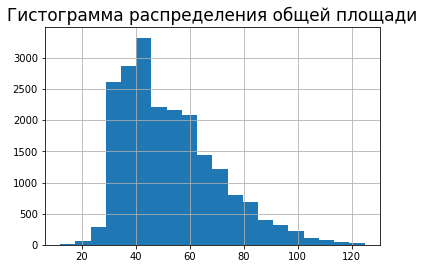

In [26]:
data['total_area'].hist(bins =20)
plt.title('Гистограмма распределения общей площади', fontsize=17)


Text(0.5, 1.0, 'Гистограмма распределения жилой площади')

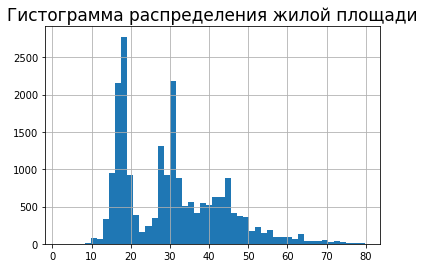

In [27]:
data['living_area'].hist(bins =50)
plt.title('Гистограмма распределения жилой площади', fontsize=17)

Text(0.5, 1.0, 'Гистограмма распределения площади кухни')

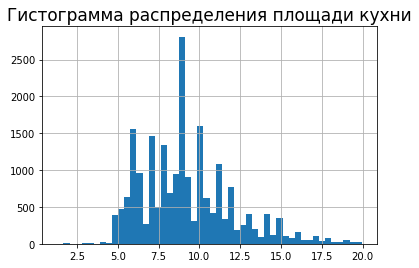

In [28]:
data['kitchen_area'].hist(bins =50)
plt.title('Гистограмма распределения площади кухни', fontsize=17)

На гистограммах хорошо видно, что распределение жилой площади и площади кухни характерно для типовой застройки. Например, пики на 17 и 30 метрах в жилой площади соответствуют одно- и двухкомнатным квартирам. Прощадь кухни в 7-8 метров это площадь кухни типовой квартиры застройки начала 90х.
Общая площадь же стремиться к нормальному распределению.

Text(0.5, 1.0, 'Гистограмма распределения цены объекта')

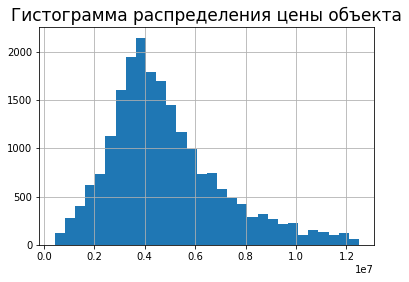

In [29]:
data['last_price'].hist(bins =30)
plt.title('Гистограмма распределения цены объекта', fontsize=17)

Очень хорошая гистограмма, показывающая нормальное распределение на большом массиве данных

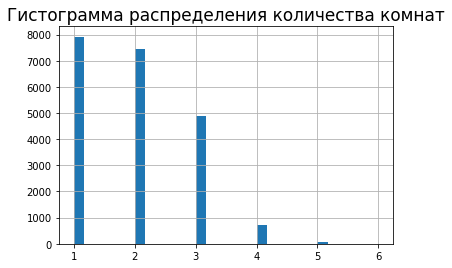

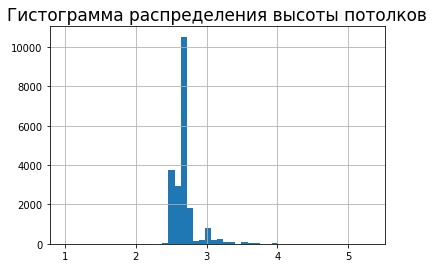

In [30]:
data['rooms'].hist(bins =30)
plt.title('Гистограмма распределения количества комнат', fontsize=17)
#plt.subplot(121)
plt.show()

data['ceiling_height'].hist(bins =50)
plt.title('Гистограмма распределения высоты потолков', fontsize=17)
#plt.subplot(122)
plt.show()

Наибольшее количество кватрир представлены на рынке - это одно- и двухкомнатные квартир.
Высота потолков также типична для массовой застройки - около 2,7 метра.

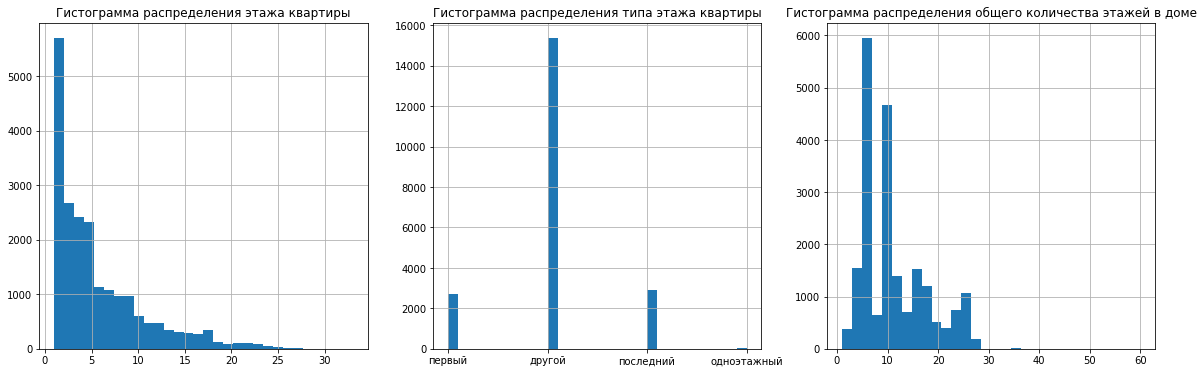

In [31]:
plt.figure(figsize=(20, 6))


plt.subplot(131)
data['floor'].hist(bins =30)
plt.title('Гистограмма распределения этажа квартиры', fontsize=12)


plt.subplot(132)
data['group_floor'].hist(bins =30)
plt.title('Гистограмма распределения типа этажа квартиры', fontsize=12)


plt.subplot(133)
data['floors_total'].hist(bins =30)
plt.title('Гистограмма распределения общего количества этажей в доме', fontsize=12)

plt.show()

Существенное число квартир продается на первых этажах, хотя количество квартир на первом этаже равно количеству квартир на последнем. При этом доля одноэтажных домов не существенна. Такое распределение квартир по этадам связано с большим количесвом пятиэтажных и десятиэтажных домов. Поэтому на первой гистаграмме два плато - 1-5 и 6-10. Дальще идет плавное снижение, так как высоток достаточно мало в ощей массе домов.

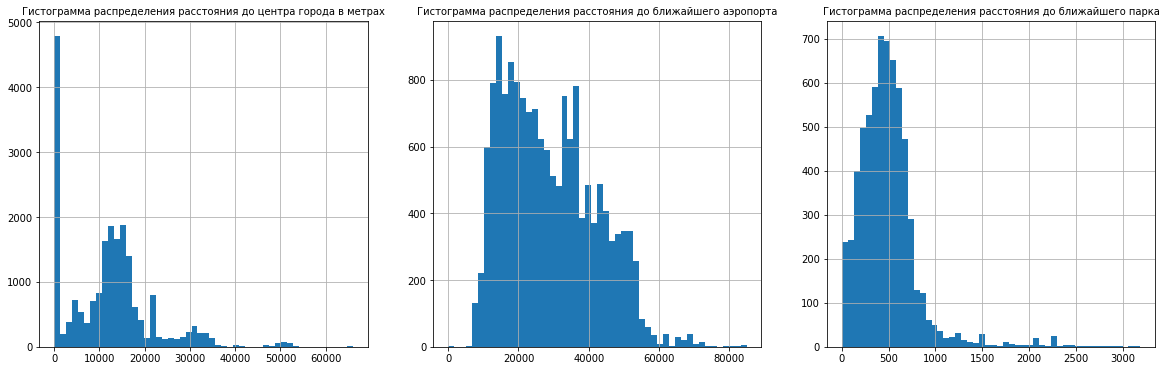

In [32]:
plt.figure(figsize=(20, 6))


plt.subplot(131)
data['cityCenters_nearest'].hist(bins =50)
plt.title('Гистограмма распределения расстояния до центра города в метрах', fontsize=10)
#plt.show()


plt.subplot(132)
data['airports_nearest'].hist(bins =50)
plt.title('Гистограмма распределения расстояния до ближайшего аэропорта', fontsize=10)

#plt.show()
plt.subplot(133)
data['parks_nearest'].hist(bins =50)
plt.title('Гистограмма распределения расстояния до ближайшего парка', fontsize=10)


plt.show()

Расстояние до центра города. Видно, что очень большое количество квартир находятся в маленьких селах и поселках, что соответсвует нулю. далее гистограмма приближается к нормальному распределению. Вторая и третья гистограммы не выдают каких либо аномалий.

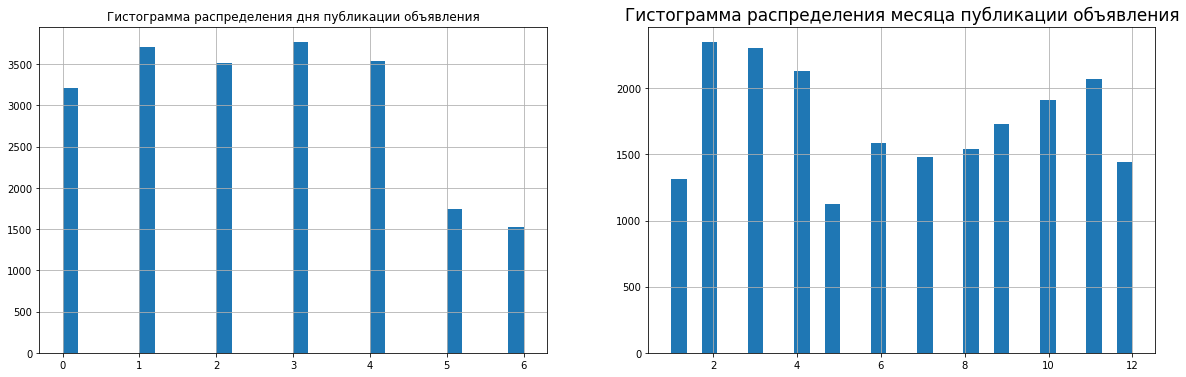

In [33]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
data['day_of_week'].hist(bins =30)
plt.title('Гистограмма распределения дня публикации объявления', fontsize=12)
plt.subplot(122)
data['month_exp'].hist(bins =30)
plt.title('Гистограмма распределения месяца публикации объявления', fontsize=17)
plt.show()

Наибольшее количество объявлений публикуется по будням, что связано с работой агенств недвижимости. В году есть два провала: декабрь-январь, что связано с новогодними хлопотами и летние месяцы, когда люди уезжают отдыхать. 

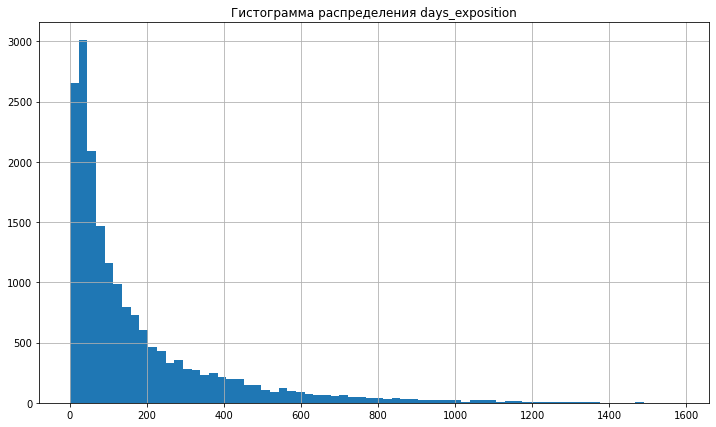

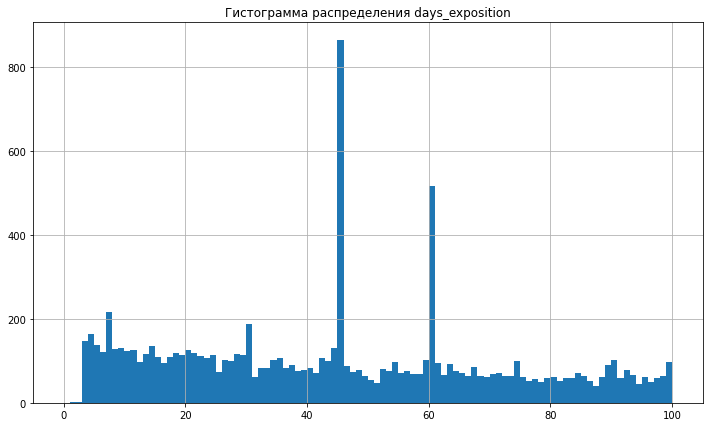

Медианное значение 91
Среднее значение 172.5980689954437


count    18436.000000
mean       172.598069
std        210.398714
min          1.000000
25%         44.000000
50%         91.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [49]:
#изучим, сколько времени "висело" объявление о продаже

data['days_exposition'].hist(bins =70, figsize=(12,7))
plt.title('Гистограмма распределения days_exposition', fontsize=12)
plt.show()
data['days_exposition'].hist(bins =100, figsize=(12,7), range=(0,100))
plt.title('Гистограмма распределения days_exposition', fontsize=12)
plt.show()
days_exposition_mean = data['days_exposition'].mean()
days_exposition_median = data['days_exposition'].median().astype('int')

print('Медианное значение',days_exposition_median)
print('Среднее значение',days_exposition_mean)

data['days_exposition'].describe()


В общем, по гистограмме видно, что большинство продаж совершались достаточно быстро. Среднее значение - около трех месяцев. Однако медианное значение в данном случае - 172 дня. Большое несовпадение. 
Быстрыми можно считать продажи меньше 40 дней.
Долгими - больше 300 дней.
Большое количество пропусков в данных говорит о том, что многие объявления все еще активны на момент выгрузки, поэтому данные могут быть искажены и доля долгих продаж может возрасти.

**<font color="maroon">Сделала более подробную гистограмму. Да, действительно есть пики на 45 и 60 дней. Скорее всего это срок размещения объявления.</font>**

"Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."

<Figure size 1440x432 with 0 Axes>

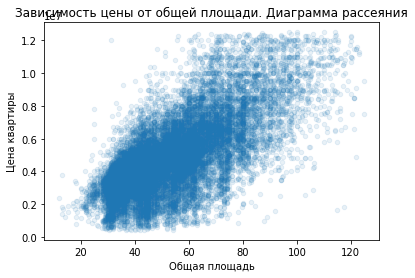

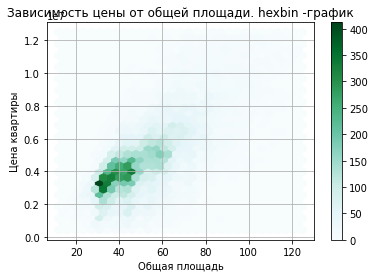

In [35]:
plt.figure(figsize=(20,6))
#plt.subplot(121)
data.plot(x='total_area', y='last_price', kind='scatter', alpha =0.1)
plt.title('Зависимость цены от общей площади. Диаграмма рассеяния', fontsize=12)
plt.xlabel('Общая площадь')
plt.ylabel('Цена квартиры')
plt.show()
#plt.subplot(122)
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=30, sharex=False, grid=True)
plt.title('Зависимость цены от общей площади. hexbin -график', fontsize=12)
plt.xlabel('Общая площадь')
plt.ylabel('Цена квартиры')
plt.show()

Да,можно сказать, что с увеличением площади в целом есть рост цены. Но есть также большое пятно, где зависимость неочевидна

<Figure size 1440x432 with 0 Axes>

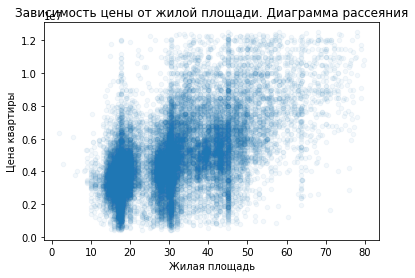

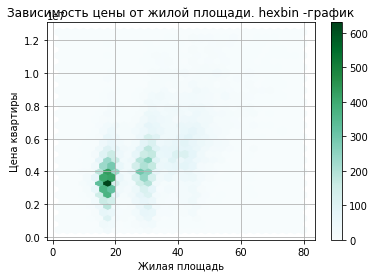

In [36]:
plt.figure(figsize=(20,6))
#plt.subplot(121)
data.plot(x='living_area', y='last_price', kind='scatter', alpha =0.05)
plt.title('Зависимость цены от жилой площади. Диаграмма рассеяния', fontsize=12)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена квартиры')
plt.show()
#plt.subplot(122)
data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=30, sharex=False, grid=True)
plt.title('Зависимость цены от жилой площади. hexbin -график', fontsize=12)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена квартиры')
plt.show()

Опять же явной корреляции нет. Есть три пятна, которые не показывают взаимоствязи цена-площадь.

<Figure size 1440x432 with 0 Axes>

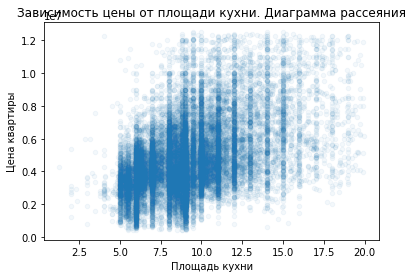

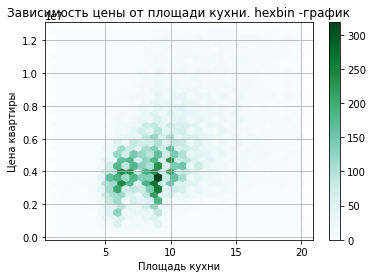

In [37]:
plt.figure(figsize=(20,6))
#plt.subplot(121)
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha =0.05)
plt.title('Зависимость цены от площади кухни. Диаграмма рассеяния', fontsize=12)
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры')
plt.show()
#plt.subplot(122)
data.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=30, sharex=False, grid=True)
plt.title('Зависимость цены от площади кухни. hexbin -график', fontsize=12)
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры')
plt.show()

В целом есть тенденция к увеличению цены от увеличения площади.

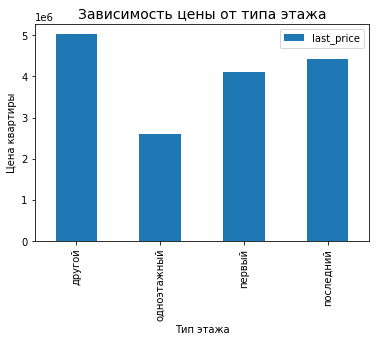

In [38]:
fl_pt=data.pivot_table(index='group_floor', values='last_price')
fl_pt.plot(kind='bar')
plt.title('Зависимость цены от типа этажа', fontsize=14)
plt.xlabel('Тип этажа')
plt.ylabel('Цена квартиры')
plt.show()

Первый и последний этажи имеют цену ниже, чем квартиры, расположенные на других этажах. В одноэтажных квартирах самая низкая цена квартир.

<Figure size 1440x432 with 0 Axes>

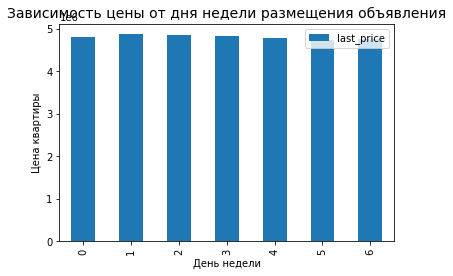

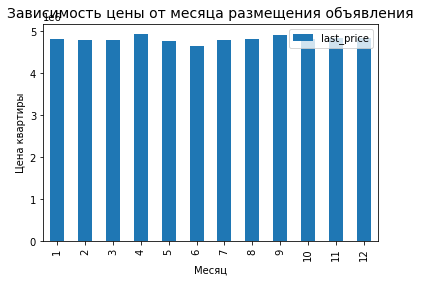

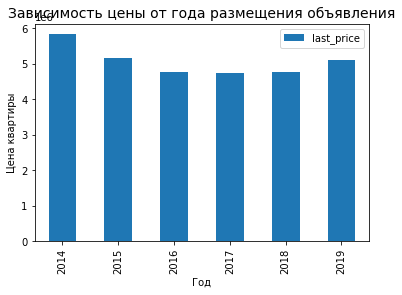

In [39]:
plt.figure(figsize=(20, 6))



day_pt=data.pivot_table(index='day_of_week', values='last_price')
day_pt.plot(kind='bar')
plt.title('Зависимость цены от дня недели размещения объявления', fontsize=14)
plt.xlabel('День недели')
plt.ylabel('Цена квартиры')
plt.show()

m_pt=data.pivot_table(index='month_exp', values='last_price')
m_pt.plot(kind='bar')
plt.title('Зависимость цены от месяца размещения объявления', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры')
plt.show()

y_pt=data.pivot_table(index='year_exp', values='last_price')
y_pt.plot(kind='bar')
plt.title('Зависимость цены от года размещения объявления', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Цена квартиры')
plt.show()


В 2016-2018 годах наблюдался спад на цены на недвижимость

**<font color="maroon">По остальным графикам я не вижу значительных тенденций. Небольшое уменьшение цены наблюдается возле нового года и летом, что коррелирует с гистограммой распределения месяца публикации объявления</font>**

 "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."

In [40]:
data_10_max=data.pivot_table(index='locality_name', values='price_p_metr', aggfunc=('count','mean'))
data_10_max['mean']=data_10_max['mean'].astype('int')

#print(data_10_max.sort_values(by='count', ascending=False).head(12))

data_10_max=data_10_max.query('count>=223')

data_10_max.columns=('кол-во объявлений','средняя цена за кв.м.')

display(data_10_max.sort_values(by='средняя цена за кв.м.', ascending=False))

,кол-во объявлений,средняя цена за кв.м.
locality_name,,
санкт_петербург,13350,105584
пушкин,329,100253
кудрово,268,92730
пок парголово,319,90410
пок мурино,524,84993
пок шушары,429,78387
колпино,331,75237
гатчина,300,68545
всеволожск,381,66958


Самая высокая цена квадратного метра в г.Санкт-Петербург. Самай низкая - в Выборге.

"Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [41]:
sp_data=data.query('locality_name=="санкт_петербург"')

sp_data_n=sp_data.query('cityCenters_round == 20')

sp_data=sp_data.pivot_table(index='cityCenters_round', values='last_price').astype('int')

sp_data.head()


,last_price
cityCenters_round,
0,8541100
1,8153967
2,7481716
3,7300159
4,7778529


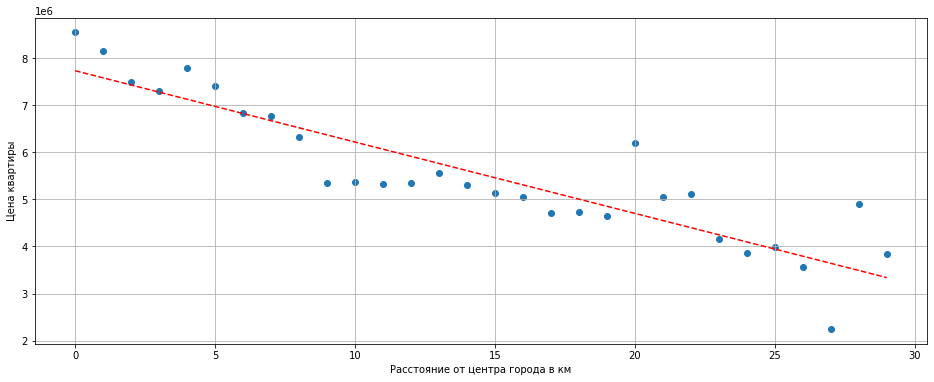

In [42]:

plt.figure(figsize=(16, 6))
x = sp_data.index
y = sp_data['last_price']
plt.scatter (x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x,p(x),"r--")
plt.xlabel('Расстояние от центра города в км')
plt.ylabel('Цена квартиры')
plt.grid(True)
plt.show()


#sp_data_n.hist(figsize=(18, 7))

#sp_data_n.head(30)

Судя по графику цена за квадратный метр уменьшается при удалении от города. На графике есть выбросы, например на 20 км. 
Попытка проанализировать ни к чему не привела.
В целом тренд (красный пунктир) на уменьшение цены.

### Общий вывод

В данном проекте были изучены и проанализированы данные о продажах квартир в Ленинградской области в 2014-2019 годах. Объем выборки достаточно большой, достаточный для анализа данных. Данные представлены неплохо, однако есть воаросы к наличию большого объема пропусков в таких столбцах, которые относятся к картографическим данным. Неплохо было бы доработать этот вопрос. Такжебыли вопросы к высоте потолков. Видимо люди ставят не тот разделитель и 2,7 превращается в 27. Лучше было бы сделать возможным т точку, и зяпятую в окне.

В ходе выполнения проекта было установлено, что основная масса продаваемых кварртир - это это одно- или двух- комнатные квартиры в пяти- и десяти- этажных домах. Существенно, что квартир на первом м последнем этажах достаточно в сумме меньше половины от общей массы квартир, хотя цена на них существенно ниже.

Также было установлено, что цена квартиры в большей степени будет определяться ее удаленностью от центра города, площадью, количеством комнат, этажем, а в меньшей степени - жилой площадью и площадью кухни. Также на цену квартир влияет тип населенного пункта. Самые догогие квартиры находятся в г.Санкт-Петербург и в ближайших к нему городах. Также на цену квартиры будет влиять время размещения объявления. По анализу данных видно, что самая нзка цена квартир в году приходится на летние месяцы и декабрь-январь. В эти де месяцы уменьшается число подаваемых объявлений, что связано с отдыхом людей. Если рассмотреть размещение по дням недели, то наибольшее количество бъявлений подаются по будням,что связано с рабочим временем. Также в

Что касается времени размещения объявления, то здесь

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод